Car License Plate Reader - Overview
1. Input Image
2. Grayscale Image
3. Binarize Image
4. Plate Localization
5. Character Segmentation
6. Character Recognition

In [2]:
# Author: Luke O'Shea Scanlan, Panagiotis Bampilis
# Module: Image Processing 2023-2024
# Group Project

import cv2
import numpy as np
import easyocr
import re
from matplotlib import pyplot as plt

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


License plate on this image is:  10-D27958


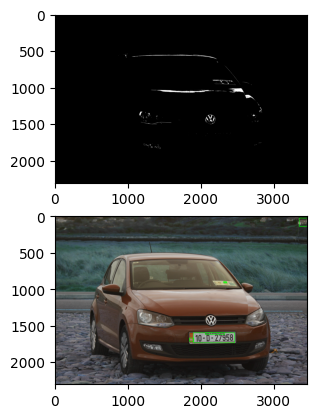

In [6]:
"""

This project aims to give the user the ability to input any sample images of car license plates
and return the results as a text output.

The product is capable of recognising car license plates rotated, as well as a certain amount of blurriness.

"""

# Input Image
image = cv2.imread("Sample Inputs/personal.JPG")

# Grayscale Image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Binarize Image
T, thres = cv2.threshold(gray, 190, 255, cv2.THRESH_BINARY)
# T = np.mean(gray)
# T, thres = cv2.threshold(gray, 190, 250, type = cv2.THRESH_BINARY_INV)

# Adaptive Inverted Threshold
thres_adaptive = cv2.adaptiveThreshold(gray, maxValue = 255,adaptiveMethod = cv2.ADAPTIVE_THRESH_GAUSSIAN_C, thresholdType = cv2.THRESH_BINARY, blockSize = 35,C = 10)

# Creating empty canvas to fill mask in
canvas = np.zeros(image.shape, np.uint8)
canvas.fill(255)

# Creating mask to fill in the contours
mask = np.zeros(image.shape, np.uint8)
mask.fill(255)
contours_mask = cv2.findContours(thres_adaptive, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Fill in with red lined contours
# contours = cv2.findContours(B, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# img = cv2.drawContours(mask, contours[0], -1, (255, 0, 0), 2) 
shape = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
morph = cv2.morphologyEx(thres_adaptive,cv2.MORPH_CLOSE,shape)
boundary = cv2.morphologyEx(morph,cv2.MORPH_GRADIENT,shape)

# Instance of reader to detect roman characters
reader = easyocr.Reader(['en'], gpu=True)

# Roman character Recognition after morphology applied or Inverted Threshold
textBox = reader.readtext(thres_adaptive)
# print(textBox)

# Boolean to be used for pattern recognition
found = False

# Drawing box around text areas
for t in textBox:
    # print(t)
    bbox, text, score = t

    cv2.rectangle(image, bbox[0], bbox[2], (0, 255, 0), 5)
    
    # Pattern that checks through for valid recognized license plates
    if found == False:
        if re.match('\w\w-', text):
            print("License plate on this image is: ", text)
            found = True
            break
        elif re.match('\w\w\s-', text):
            print("License plate on this image is: ", text)
            found = True
            break
        elif re.match('\w\w\w-', text):
            print("License plate on this image is: ", text)
            found = True
            break
        elif re.match('\w\w\w\s-', text):
            print("License plate on this image is: ", text)
            found = True
            break

if found == False:
    print("Licenses Plates not found!")

# For loop to be used to mask out the license plates number
# for c in contours:
#     if contours == 0:
#         canvas = cv2.fillConvexPoly(mask, contours_mask[contours], (0, 0, 0,))

fig, args = plt.subplots(2, 1)
args[0].imshow(thres, cmap='gray')
args[1].imshow(image)

# cv2.imwrite("new_image.jpg", boundary)
# plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
# plt.imshow(thres, cmap='gray')
# plt.show() 
# cv2.destroyAllWindows()
# cv2.waitKey(1) 
